In [1]:
# Packages
import transformers
from sentence_transformers import SentenceTransformer
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import os
import numpy as np
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading calculated embeddings
risvig_embeddings = np.load('/work/Ccp-MePSDA/modelling/embeddings/embeddings.npy')
keyword_embeddings = np.load('/work/Ccp-MePSDA/modelling/embeddings/list_embeddings.npy')

mean_embedding = np.mean(keyword_embeddings, axis=0)

In [4]:
# Reshape mean_embedding to be 2D to match the input requirements of cosine_similarity
mean_embedding_reshaped = mean_embedding.reshape(1, -1)

# Calculate cosine similarities between mean_embedding and risvig_embeddings
cossims = cosine_similarity(mean_embedding_reshaped, risvig_embeddings)

# Flatten for 1D array for similarity purpose
cossims = cossims.flatten()

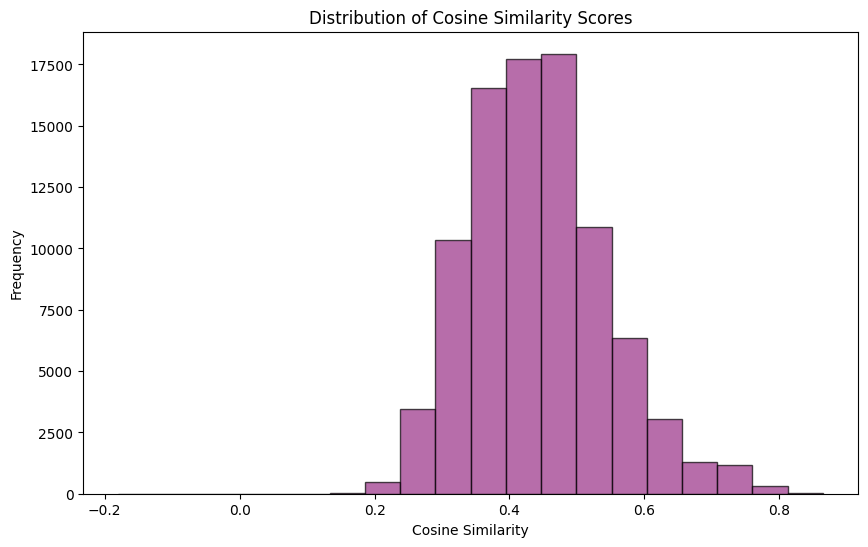

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(cossims, bins=20, alpha=0.7, edgecolor='black', color='#992f87')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
plt.show()